## Scikit-Learn_Mnist

In [ ]:
!pip install scikit-learn

In [1]:
from sklearn import datasets
print(dir(datasets))

['__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__getattr__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_arff_parser', '_base', '_california_housing', '_covtype', '_kddcup99', '_lfw', '_olivetti_faces', '_openml', '_rcv1', '_samples_generator', '_species_distributions', '_svmlight_format_fast', '_svmlight_format_io', '_twenty_newsgroups', 'clear_data_home', 'dump_svmlight_file', 'fetch_20newsgroups', 'fetch_20newsgroups_vectorized', 'fetch_california_housing', 'fetch_covtype', 'fetch_kddcup99', 'fetch_lfw_pairs', 'fetch_lfw_people', 'fetch_olivetti_faces', 'fetch_openml', 'fetch_rcv1', 'fetch_species_distributions', 'get_data_home', 'load_breast_cancer', 'load_diabetes', 'load_digits', 'load_files', 'load_iris', 'load_linnerud', 'load_sample_image', 'load_sample_images', 'load_svmlight_file', 'load_svmlight_files', 'load_wine', 'make_biclusters', 'make_blobs', 'make_checkerboard', 'make_circles', 'make_classification', 'make_friedman1', 'make_f

In [2]:
from sklearn import datasets

mnist = datasets.load_digits()
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
X, y = mnist.data, mnist.target
X[:].shape # 特徵64個欄位

(1797, 64)

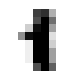

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize = (0.8 , 0.8))
plt.imshow(X[1].reshape(8, 8), cmap = 'gray_r')
plt.axis('off')
plt.show()

In [5]:
# 取出 X, y
X, y = mnist.data, mnist.target

# 區分訓練&測試
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

# 選擇演算法
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# 進行訓練
model.fit(X_train, y_train)

# 預測&評估
model.score(X_train, y_train), model.score(X_test, y_test)

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(1.0, 0.9638888888888889)

In [6]:
# 承上，加入StandardScaler

# 取出 X, y
X, y = mnist.data, mnist.target

# 加入資料標準化（sklearn.preprocessing.StandardScaler）
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_ss = ss.fit_transform(X)

# 區分訓練&測試
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size = 0.2 , random_state = 1234)

# 選擇演算法
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# 進行訓練
model.fit(X_train, y_train)

# 預測&評估
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9993041057759221, 0.9638888888888889)

## 驗證Tensorflow

In [ ]:
!pip install keras==2.3.1

In [ ]:
!pip install tensorflow-gpu==2.8.0

In [ ]:
!pip install protobuf==3.20.3

In [7]:
import tensorflow
tensorflow.version

<module 'tensorflow._api.v2.version' from 'C:\\Python310\\lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>

In [8]:
import keras

In [10]:
# 導入函式庫
import numpy as np
import keras

# from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將label標籤轉為one-hot-encoding
from matplotlib import pyplot as plt
import os
from datetime import datetime

start = datetime.now()

# 載入MNIST資料庫的訓練資料，並自動分為『訓練組』及『測試組』
#(X_train, y_train), (X_test, y_test) = mnist.load_data(os.path.join(os.getcwd(), 'datasets/mnist.npz'))
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 4s 0us/step


In [11]:
X_train[0].shape

(28, 28)

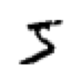

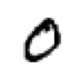

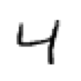

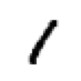

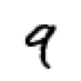

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

for i in range(5):    
    plt.figure(figsize = (0.8 , 0.8))
    plt.imshow(X_train[i], cmap = 'gray_r')
    plt.axis('off')
    plt.show()

In [13]:
# 建立簡單的線性執行的模型
model = keras.models.Sequential()

# Add Input layer, 隱藏層(hidden layer)有256個輸出變數
model.add(Dense(units = 256, input_dim = 784, kernel_initializer = 'normal', activation = 'relu')) 

# model.add(Dense(units=64, input_dim=784, kernel_initializer='normal', activation='relu')) 

# Add output layer
model.add(Dense(units = 10, kernel_initializer = 'normal', activation = 'softmax'))

# 編譯：選擇損失函數、優化方法及成效衡量方式
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy']) 

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [15]:
y_test[:3],\
np_utils.to_categorical(y_test)[:3]

(array([7, 2, 1], dtype=uint8),
 array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))

In [16]:
# 將training的label進行one-hot encoding，例如數字7經過One-hot encoding，轉換後是0000001000，即第7個值為1
y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test) 

# 將Training的Input資料轉為二維
X_train_2D = X_train.reshape(60000, 28 * 28).astype('float32')  
X_test_2D = X_test.reshape(10000, 28 * 28).astype('float32')  

x_Train_norm = X_train_2D / 255 # 標準化就是0-1之間數字
x_Test_norm = X_test_2D / 255

# 進行訓練 -> 訓練過程會存在train_history變數中callback
train_history = model.fit(x = x_Train_norm, y = y_TrainOneHot, 
                          validation_split = 0.2, 
                          epochs = 10, 
                          batch_size = 800, 
                          verbose = 1
                          )  

Epoch 1/10
60/60 [==============================] - 1s 16ms/step - loss: 0.7988 - accuracy: 0.8029 - val_loss: 0.3242 - val_accuracy: 0.9105
Epoch 2/10
60/60 [==============================] - 1s 14ms/step - loss: 0.2975 - accuracy: 0.9169 - val_loss: 0.2443 - val_accuracy: 0.9313
Epoch 3/10
60/60 [==============================] - 1s 14ms/step - loss: 0.2338 - accuracy: 0.9345 - val_loss: 0.2048 - val_accuracy: 0.9434
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.1963 - accuracy: 0.9434 - val_loss: 0.1820 - val_accuracy: 0.9508
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 0.1669 - accuracy: 0.9530 - val_loss: 0.1614 - val_accuracy: 0.9546
Epoch 6/10
60/60 [==============================] - 1s 13ms/step - loss: 0.1438 - accuracy: 0.9598 - val_loss: 0.1454 - val_accuracy: 0.9593
Epoch 7/10
60/60 [==============================] - 1s 13ms/step - loss: 0.1259 - accuracy: 0.9654 - val_loss: 0.1348 - val_accuracy: 0.9631
Epoch 8/10
60

In [17]:
train_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

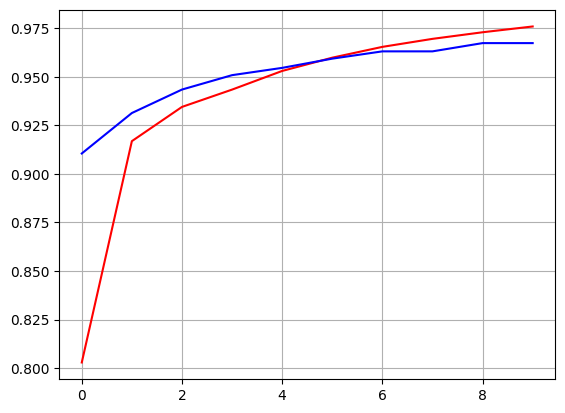

In [18]:
%matplotlib inline
# accuracy chart
import matplotlib.pyplot as plt

plt.plot(train_history.history['accuracy'], color = 'red')
plt.plot(train_history.history['val_accuracy'], color = 'blue')
plt.grid()
plt.show()

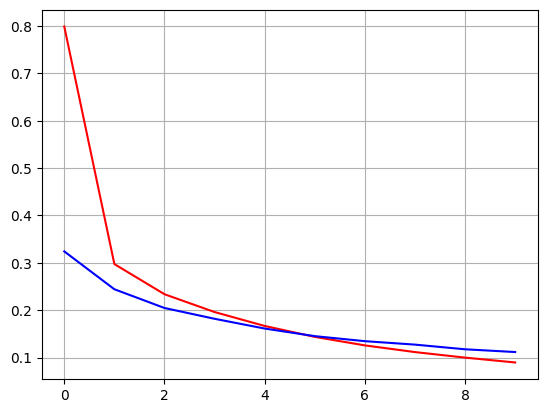

In [19]:
%matplotlib inline
# loss chart
import matplotlib.pyplot as plt

plt.plot(train_history.history['loss'], color = 'red')
plt.plot(train_history.history['val_loss'], color = 'blue')
plt.grid()
plt.show()

In [20]:
# 顯示訓練成果（分數）
scores = model.evaluate(x_Test_norm, y_TestOneHot)
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1] * 100.0))
scores = model.evaluate(x_Train_norm, y_TrainOneHot)
print("\t[Info] Accuracy of training data = {:2.1f}%".format(scores[1] * 100.0))

313/313 [==============================] - 1s 3ms/step - loss: 0.1038 - accuracy: 0.9692
	[Info] Accuracy of testing data = 96.9%
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0866 - accuracy: 0.9764
	[Info] Accuracy of training data = 97.6%


In [21]:
# 預測(prediction)
X = x_Test_norm
predictions = np.argmax(model.predict(X), axis = 1) # np.argmax找出最佳的數字softmax
model.predict(X)[:3]

array([[2.0845537e-06, 2.5797076e-08, 2.8317963e-04, 1.8292199e-03,
        1.9281581e-08, 2.2069464e-05, 1.5450792e-10, 9.9781150e-01,
        5.1035859e-06, 4.6819852e-05],
       [8.8398338e-06, 1.5902667e-03, 9.9778360e-01, 3.1188515e-04,
        1.2815421e-10, 7.7037985e-05, 5.0187355e-05, 6.4847967e-11,
        1.7816649e-04, 1.7198586e-10],
       [5.4872751e-05, 9.8897833e-01, 2.2638228e-03, 8.3397032e-04,
        4.9386703e-04, 4.7431901e-04, 3.5051690e-04, 4.9895309e-03,
        1.4621484e-03, 9.8667770e-05]], dtype=float32)

In [22]:
# get prediction result

print('prediction:', predictions[0:20])
print('actual    :', y_test[0:20])

prediction: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
actual    : [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [23]:
# 模型結構存檔
from keras.models import model_from_json
json_string = model.to_json()
with open("model.config", "w") as text_file:
    text_file.write(json_string)
    
# 模型訓練結果存檔
model.save_weights("model.weight")

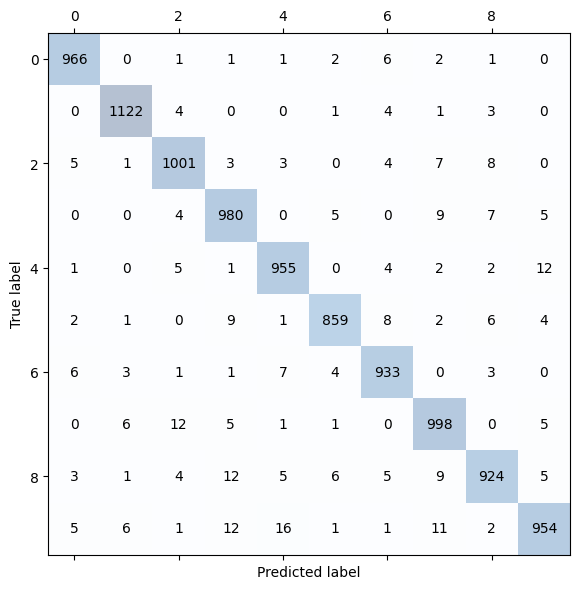

In [24]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true = y_test, y_pred = predictions)

# draw confusion_matrix
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(confmat, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x = j, y = i, s = confmat[i, j], va = 'center', ha = 'center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

In [25]:
# 取得模型組態
print("config = ", model.get_config())

# 取得模型所有權重
print("weights = ", model.get_weights())

# 取得模型彙總資訊
print("summary = ", model.summary())

# 取得網路層資訊
print("layer = ", model.get_layer(index = 1).name)

# 取得參數總數
print("params = ", model.count_params())

config =  {'name': 'sequential', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 784), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'dense_input'}}, {'class_name': 'Dense', 'config': {'name': 'dense', 'trainable': True, 'batch_input_shape': (None, 784), 'dtype': 'float32', 'units': 256, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'RandomNormal', 'config': {'mean': 0.0, 'stddev': 0.05, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'Dense', 'config': {'name': 'dense_1', 'trainable': True, 'dtype': 'float32', 'units': 10, 'activation': 'softmax', 'use_bias': True, 'kernel_initializer': {'class_name': 'RandomNormal', 'config': {'mean': 0.0, 'stddev': 0.05, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, '

## 驗證Tensorflow_Scikit-Learn-Digit

In [1]:
# 導入函式庫
import numpy as np
import keras
# from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將label標籤轉為one-hot-encoding
from matplotlib import pyplot as plt
import os
from datetime import datetime
from sklearn import datasets
from sklearn.model_selection import train_test_split

start = datetime.now()

# 載入MNIST資料庫的訓練資料，並自動分為『訓練組』及『測試組』
mnist = datasets.load_digits()
X, y = mnist.data, mnist.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)
# (X_train, y_train), (X_test, y_test) = mnist.load_data()

In [2]:
X_train.shape, X_test.shape

((1437, 64), (360, 64))

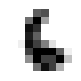

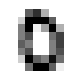

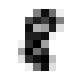

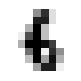

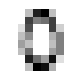

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure(figsize = (0.8 , 0.8))
    plt.imshow(X_train[i].reshape(8, 8), cmap = 'gray_r')
    plt.axis('off')
    plt.show()

In [4]:
# 建立簡單的線性執行的模型
model = keras.models.Sequential()

# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
model.add(Dense(units = 256, input_dim = 8 * 8, kernel_initializer = 'normal', activation = 'relu')) 
model.add(Dense(units = 64, kernel_initializer = 'normal', activation = 'relu')) # 第二層 NN

# Add output layer
model.add(Dense(units = 10, kernel_initializer = 'normal', activation = 'softmax'))

# 編譯：選擇損失函數、優化方法及成效衡量方式
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy']) 

# 將Training的label進行one-hot encoding，例如數字7經過One-hot encoding，轉換後是0000001000，即第7個值為1

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               16640     
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 33,738
Trainable params: 33,738
Non-trainable params: 0
_________________________________________________________________


In [6]:
y_test[:3],\
np_utils.to_categorical(y_test)[:3]

(array([7, 1, 7]),
 array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32))

In [7]:
X_train.shape, X_test.shape

((1437, 64), (360, 64))

In [8]:
# 將Training的label進行one-hot encoding，例如數字7經過One-hot encoding，轉換後是0000001000，即第7個值為1
y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test) 


# 將Training的Input資料轉為二維
X_train_2D = X_train.reshape(X_train.shape[0], 8 * 8).astype('float32')  
X_test_2D = X_test.reshape(X_test.shape[0], 8 * 8).astype('float32')  

x_Train_norm = X_train_2D / 255 # 標準化就是0-1之間數字
x_Test_norm = X_test_2D / 255

# 進行訓練，訓練過程會存在train_history變數中callback
train_history = model.fit(x = x_Train_norm, y = y_TrainOneHot, 
                          validation_split = 0.2, 
                          epochs = 40, 
                          batch_size = 10, 
                          verbose = 1
                          )  

Epoch 1/40
115/115 [==============================] - 2s 6ms/step - loss: 2.2391 - accuracy: 0.2715 - val_loss: 2.0378 - val_accuracy: 0.4688
Epoch 2/40
115/115 [==============================] - 0s 4ms/step - loss: 1.4933 - accuracy: 0.6214 - val_loss: 1.0684 - val_accuracy: 0.7014
Epoch 3/40
115/115 [==============================] - 0s 3ms/step - loss: 0.8468 - accuracy: 0.7598 - val_loss: 0.7452 - val_accuracy: 0.7986
Epoch 4/40
115/115 [==============================] - 0s 3ms/step - loss: 0.6463 - accuracy: 0.8050 - val_loss: 0.6108 - val_accuracy: 0.8299
Epoch 5/40
115/115 [==============================] - 0s 4ms/step - loss: 0.5520 - accuracy: 0.8207 - val_loss: 0.4840 - val_accuracy: 0.8819
Epoch 6/40
115/115 [==============================] - 0s 4ms/step - loss: 0.4675 - accuracy: 0.8625 - val_loss: 0.4135 - val_accuracy: 0.8854
Epoch 7/40
115/115 [==============================] - 0s 4ms/step - loss: 0.4153 - accuracy: 0.8721 - val_loss: 0.3847 - val_accuracy: 0.8993
Epoch 

In [9]:
train_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

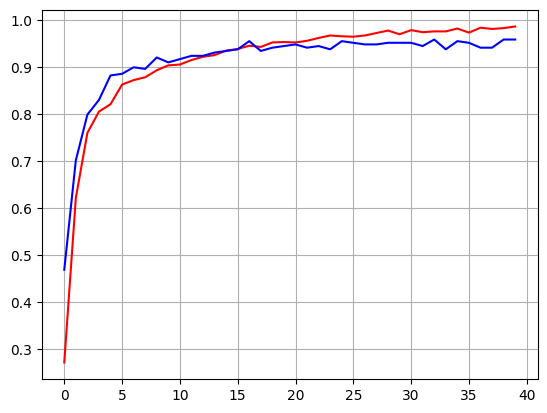

In [10]:
%matplotlib inline
# accuracy chart
import matplotlib.pyplot as plt

plt.plot(train_history.history['accuracy'], color = 'red')
plt.plot(train_history.history['val_accuracy'], color = 'blue')
plt.grid()
plt.show()

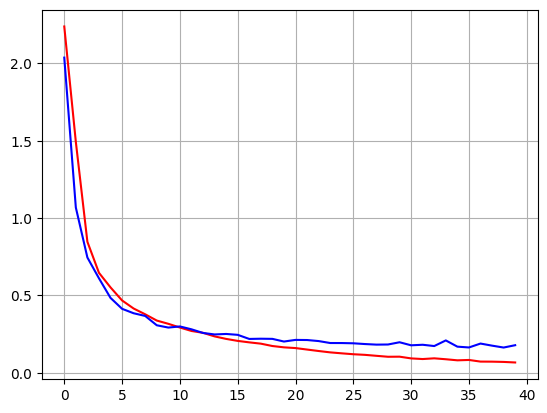

In [11]:
%matplotlib inline
# loss chart
import matplotlib.pyplot as plt

plt.plot(train_history.history['loss'], color = 'red')
plt.plot(train_history.history['val_loss'], color = 'blue')
plt.grid()
plt.show()

In [12]:
# 顯示訓練成果（分數）

scores = model.evaluate(x_Test_norm, y_TestOneHot)
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1] * 100.0))
scores = model.evaluate(x_Train_norm, y_TrainOneHot)
print("\t[Info] Accuracy of training data = {:2.1f}%".format(scores[1] * 100.0))

12/12 [==============================] - 0s 4ms/step - loss: 0.1645 - accuracy: 0.9444
	[Info] Accuracy of testing data = 94.4%
45/45 [==============================] - 0s 3ms/step - loss: 0.0812 - accuracy: 0.9833
	[Info] Accuracy of training data = 98.3%


In [13]:
# 預測（prediction）

X = x_Test_norm
predictions = np.argmax(model.predict(X), axis = 1) # np.argmax找出最佳的數字softmax
model.predict(X)[:3]

array([[2.29194132e-13, 1.75221976e-06, 5.99481098e-12, 1.17227955e-07,
        9.40834013e-07, 5.48410640e-07, 6.99148274e-17, 9.99941945e-01,
        7.98776728e-06, 4.67375612e-05],
       [5.51109952e-06, 9.34579730e-01, 4.33534095e-14, 1.20234178e-09,
        9.40624718e-03, 1.93619826e-06, 1.10935979e-03, 3.68231809e-07,
        1.58462627e-03, 5.33122942e-02],
       [1.76289209e-15, 1.08464633e-06, 4.63711025e-09, 8.30014415e-06,
        3.92499402e-08, 1.83213615e-07, 4.75435747e-18, 9.99961972e-01,
        1.40585453e-05, 1.42609370e-05]], dtype=float32)

In [14]:
# get prediction result
print('prediction:', predictions[0:20])
print('actual    :', y_test[0:20])

prediction: [7 1 7 6 0 2 4 3 6 3 7 8 7 9 4 3 8 7 8 4]
actual    : [7 1 7 6 0 2 4 3 6 3 7 8 7 9 4 3 8 7 8 4]


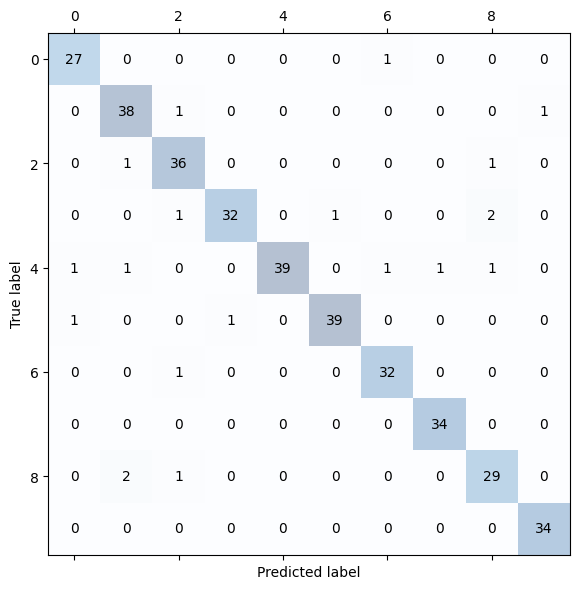

In [15]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true = y_test, y_pred = predictions)

# draw confusion_matrix
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (6, 6))
ax.matshow(confmat, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x = j, y = i, s = confmat[i, j], va = 'center', ha = 'center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
# plt.savefig('images/06_09.png', dpi = 300)
plt.show()